In [81]:
from tensorflow import keras

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [83]:
import seaborn as sns
import os
from datetime import datetime

In [84]:
import warnings
warnings.filterwarnings("ignore")

In [85]:
data = pd.read_csv('TSLA.csv')
print(data.shape)
print(data.sample(7))

(1258, 7)
            Date        Open        High         Low       Close   Adj Close  \
951   2022-11-08  194.020004  195.199997  186.750000  191.300003  191.300003   
13    2019-02-20   20.294001   20.420000   19.933332   20.170668   20.170668   
1107  2023-06-26  250.070007  258.369995  240.699997  241.050003  241.050003   
170   2019-10-03   15.457333   15.632000   14.952000   15.535333   15.535333   
695   2021-11-02  386.453339  402.863342  382.000000  390.666656  390.666656   
104   2019-07-01   15.347333   15.540000   15.085333   15.144667   15.144667   
925   2022-10-03  254.500000  255.160004  241.009995  242.399994  242.399994   

         Volume  
951   128803400  
13    107131500  
1107  179990600  
170   226267500  
695   128213400  
104   123201000  
925    98363500  


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [87]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Adj Close  1258 non-null   float64       
 6   Volume     1258 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


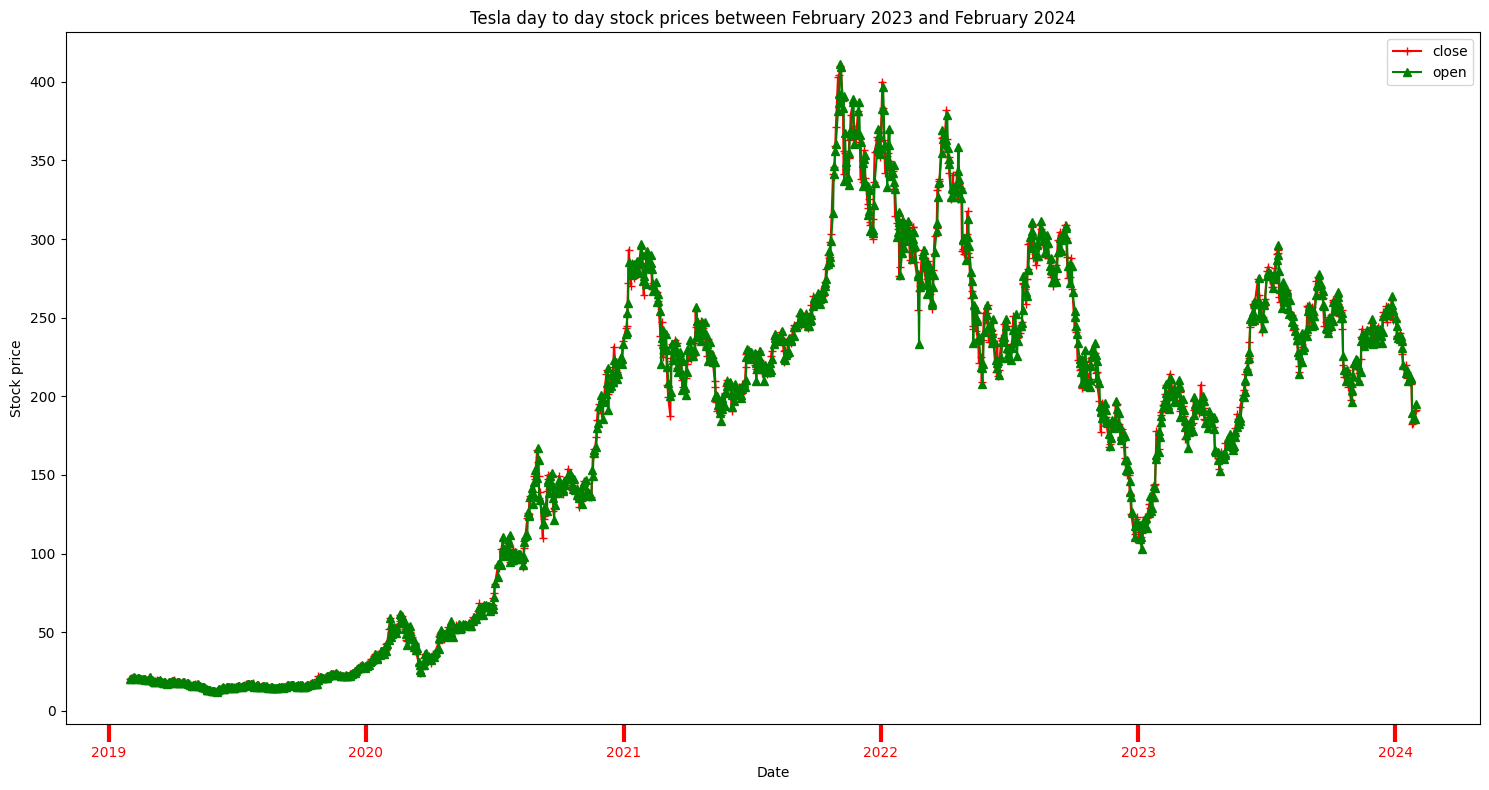

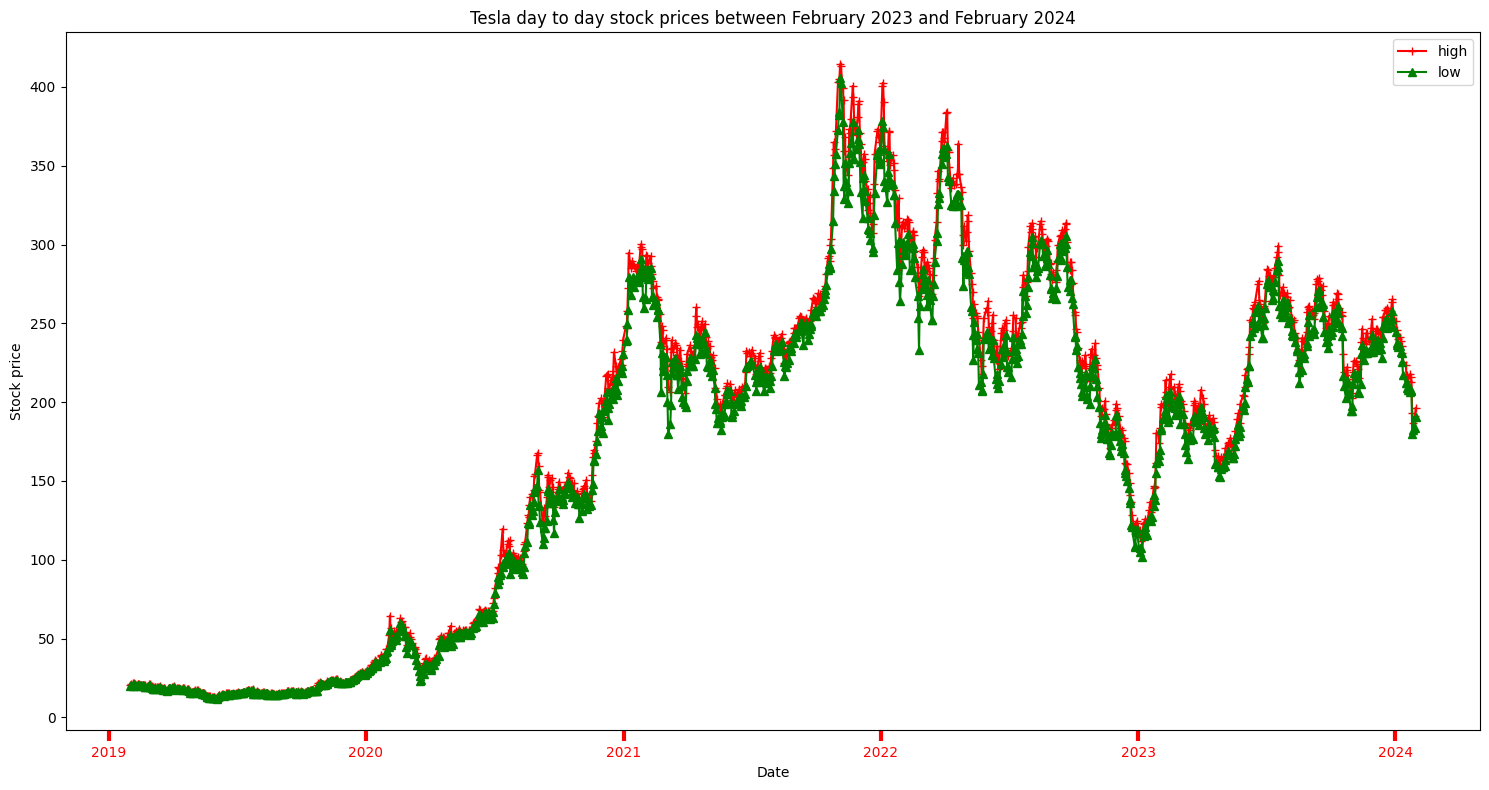

In [88]:


# date vs open
# date vs close
plt.figure(figsize=(15, 8))


plt.subplot(1, 1, 1)
plt.xlabel("Date")
plt.ylabel("Stock price")
plt.tick_params(axis='x', colors='red', direction='out', length=13, width=3)
plt.plot(data['Date'], data['Close'], c="r", label="close", marker="+")
plt.plot(data['Date'], data['Open'], c="g", label="open", marker="^")
plt.title('Tesla day to day stock prices between February 2023 and February 2024')
plt.legend()
plt.tight_layout()

plt.figure(figsize=(15, 8))
plt.xlabel("Date")
plt.ylabel("Stock price")
plt.tick_params(axis='x', colors='red', direction='out', length=8, width=3)
plt.subplot(1, 1, 1)
plt.plot(data['Date'], data['High'], c="r", label="high", marker="+")
plt.plot(data['Date'], data['Low'], c="g", label="low", marker="^")
plt.title('Tesla day to day stock prices between February 2023 and February 2024')
plt.legend()
plt.tight_layout()

In [89]:
close_data = data.filter(['Close'])
dataset = close_data.to_numpy()
training = int(np.ceil(len(dataset) * .95))
print(training)

1196


In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
 
train_data = scaled_data[0:int(training), :]
# prepare feature and labels
x_train = []
y_train = []
 
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
 
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [91]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 60, 64)            │     16,896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)                │     33,024 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_6 (Dense)                 │ (None, 32)                │      2,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_3 (Dropout)             │ (None, 32)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_7 (Dense)                 │ (None, 1)                 │         33 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
model.compile(optimizer='adam',
              loss='mean_squared_error')
history = model.fit(x_train,
                    y_train,
                    epochs=10)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0773
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0120
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0115
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0104
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0080
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0085
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0086
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0087
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0084
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0075


In [93]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
 
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
 
# predict the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
 
# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
MSE 146.1038204606646
RMSE 12.087341331354244


In [94]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
 
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
 
# predict the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
 
# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
MSE 146.1038204606646
RMSE 12.087341331354244


1196   2023-10-31
1197   2023-11-01
1198   2023-11-02
1199   2023-11-03
1200   2023-11-06
          ...    
1253   2024-01-24
1254   2024-01-25
1255   2024-01-26
1256   2024-01-29
1257   2024-01-30
Name: Date, Length: 62, dtype: datetime64[ns]


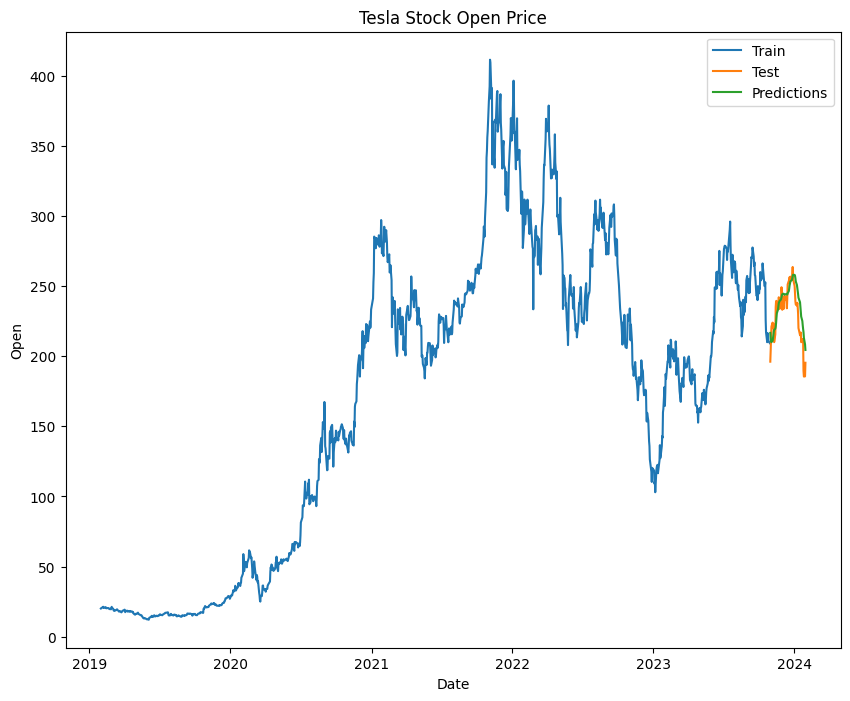

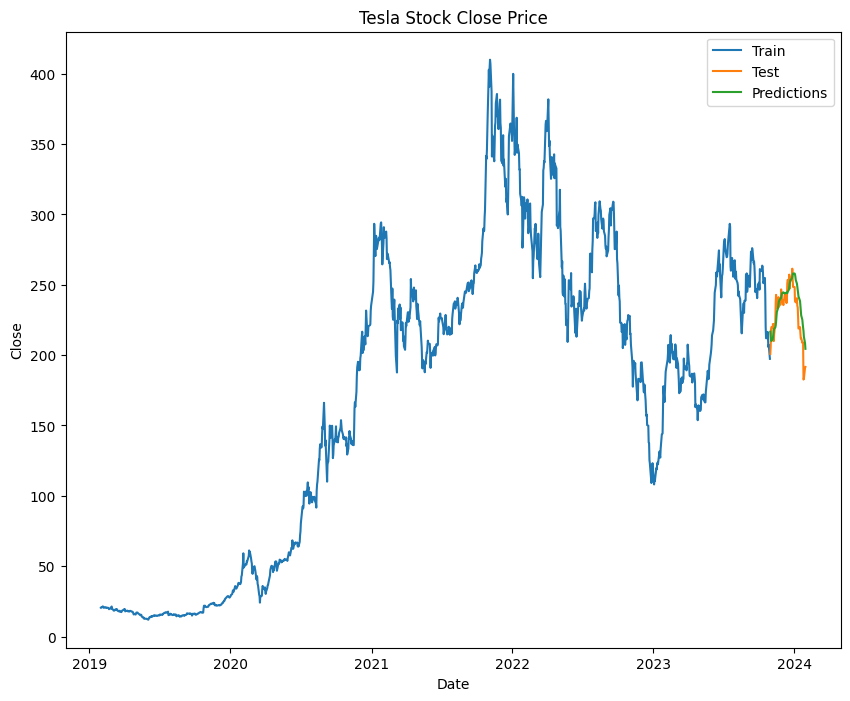

In [98]:
# Plot last 5 years of Tesla stock open and close with the predicted values 
train = data[:training]
test = data[training:]
test['Predictions'] = predictions
print(test['Date'])

plt.figure(figsize=(10, 8))
plt.plot(train['Date'], train['Open'])
plt.plot(test['Date'], test[['Open', 'Predictions']])
plt.title('Tesla Stock Open Price')
plt.xlabel('Date')
plt.ylabel("Open")
plt.legend(['Train', 'Test', 'Predictions'])
 
plt.figure(figsize=(10, 8))
plt.plot(train['Date'], train['Close'])
plt.plot(test['Date'], test[['Close', 'Predictions']])
plt.title('Tesla Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])